# using Random
using Plots
using LinearAlgebra
using Distributions

In [2]:
struct Perceptron
    weights::Vector{Real}
    cost::Real
end

function sigmoid(z)
    sigmoid_act = (1+exp(-z))^(-1)
    
    if sigmoid_act >= 0.5
        return 1
    end
    return -1
    
end
    
function signum(z)
    
    if z >= 0
        return 1
    end
    
    return -1
end

function perceptron_learning_rule(X, y, epochs=10, learning_rate=0.01)
    
    n, p = size(X)
    d = Uniform(-1,1)
    weight_vec = rand(d, p+1)               # Initialize the weights using random values
    perceptron_updates = Perceptron[]
    cost = 10000
    push!(perceptron_updates, Perceptron(weight_vec, cost))
    best_model = perceptron_updates[end]
    t = 0
    
    while cost > 0 && t < epochs
        
        running_cost = 0
        
        for i=1:n
        
            # calculate the predictions using the model parameters
            weight_vec_prev = weight_vec
            y_hat = predict(weight_vec, X[i,:])
            
            # update the parameters using the data
            weight_vec[1] = weight_vec_prev[1] + learning_rate * (y[i] - y_hat)
            for j = 1:p
                weight_vec[j+1] = weight_vec_prev[j+1] + learning_rate * (y[i] - y_hat) * X[i,j]
            end
            
            running_cost = running_cost + abs(y[i] - y_hat)
        end
        
        cost = running_cost
        println("Cost = $cost")
        push!(perceptron_updates, Perceptron(weight_vec, cost))
        
        if best_model.cost > cost
            best_model = perceptron_updates[end]
        end
        
        t = t + 1
    end
    
    return best_model
end

function predict(weights, x)
    return sigmoid(dot(x, weights[2:end]) + weights[1])
end

function predict(predictor::Perceptron, x)
    return sigmoid(dot(x, predictor.weights[2:end]) + predictor.weights[1])
end

function misclassification_rate(y_true, y_pred)
    misclassifications = []
    for i=1:length(y_true)
        if y_true[i] == y_pred[i]
            push!(misclassifications, 0)
        else
            push!(misclassifications, 1)
        end
    end
    return sum(misclassifications)/length(y_true)
end

misclassification_rate (generic function with 1 method)

## Example 1 (few samples)

### Creating artificial data

In [3]:
X = transpose([[10,17] [17, 27] [32,19] [35, 27] [24,11] [25,15] [22,24] [26,33] [22, 11] [14,18]])
y = [-1, -1, 1, 1, 1, 1, -1, -1, 1, -1];

### Visualizing the artificial data

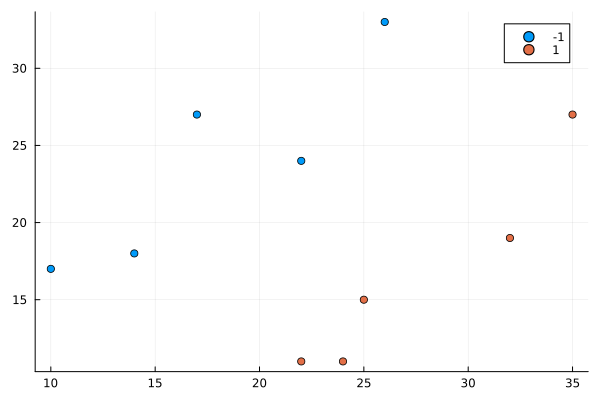

In [4]:
scatter(X[:,1], X[:,2], group=y)

### Training the perceptron model

In [5]:
perceptron_model =  perceptron_learning_rule(X, y, 10)

Cost = 10
Cost = 0


Perceptron(Real[-0.964510276853672, 0.324546009851408, -0.3785511807141253], 0)

### Visualizing the predictions

In [6]:
y_preds = [predict(perceptron_model, X[i,:]) for i = 1:size(X)[1]]
misclassification = misclassification_rate(y, y_preds) * 100
misclassification = round(misclassification, digits=2)
println("Misclassification rate: $misclassification %")

Misclassification rate: 0.0 %


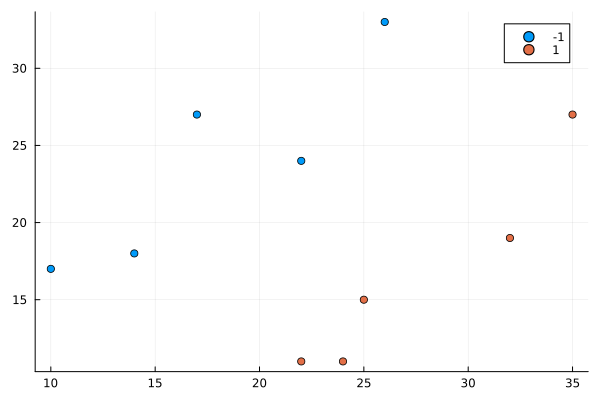

In [7]:
scatter(X[:,1], X[:,2], group=y_preds)

## Example 2 (many samples)

### Creating artificial data

In [8]:
d1 = MvNormal([5, 10], [[10, 6] [6, 5]])
d2 = MvNormal([10, 5], [[10, 6] [6, 5]])

FullNormal(
dim: 2
μ: [10.0, 5.0]
Σ: [10.0 6.0; 6.0 5.0]
)


In [9]:
N =1000
A = transpose(rand(d1, N))
yA = ones(N)
A = hcat(A, yA)
B = transpose(rand(d2, N))
yB = -1 .* ones(N)
B = hcat(B, yB)
C = vcat(A, B)

2000×3 Matrix{Float64}:
  8.00145  13.6045    1.0
 10.909    14.1558    1.0
  2.35118   8.34443   1.0
  2.90902   8.9647    1.0
  2.77788   7.9356    1.0
  2.2284    7.52391   1.0
  1.13006   7.15946   1.0
  4.99113   8.9033    1.0
  9.76312  13.3242    1.0
  6.03399  12.0693    1.0
  5.3677    7.62701   1.0
  1.8422    9.21708   1.0
  1.29127   9.01621   1.0
  ⋮                  
  9.45204   5.2937   -1.0
  6.78922   3.59217  -1.0
 10.7247    6.19208  -1.0
  8.77869   4.02385  -1.0
 14.3964    6.99207  -1.0
  9.29295   4.26405  -1.0
  7.42011   2.54878  -1.0
 11.1493    7.32065  -1.0
 11.9138    5.83296  -1.0
 11.2448    6.55333  -1.0
  7.84656   4.04188  -1.0
  9.16515   3.79938  -1.0

### Visualizing the artificial data

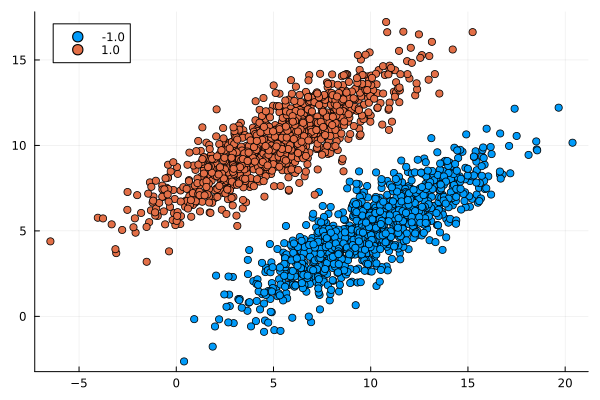

In [10]:
C = C[shuffle(1:end), :]
scatter(C[:,1], C[:, 2], group=C[:,3])

### Training the perceptron model

In [11]:
X = C[:,1:2]
y = C[:,end]
perceptron_model =  perceptron_learning_rule(X, y, 19)

Cost = 30.0
Cost = 12.0
Cost = 0.0


Perceptron(Real[-0.6626454539931905, -0.8977751901902755, 0.9935459225481337], 0.0)

### Visualizing the predictions

In [12]:
y_preds = [predict(perceptron_model, X[i,:]) for i = 1:size(X)[1]]
misclassification = misclassification_rate(y, y_preds) * 100
misclassification = round(misclassification, digits=2)
println("Misclassification rate: $misclassification %")

Misclassification rate: 0.0 %


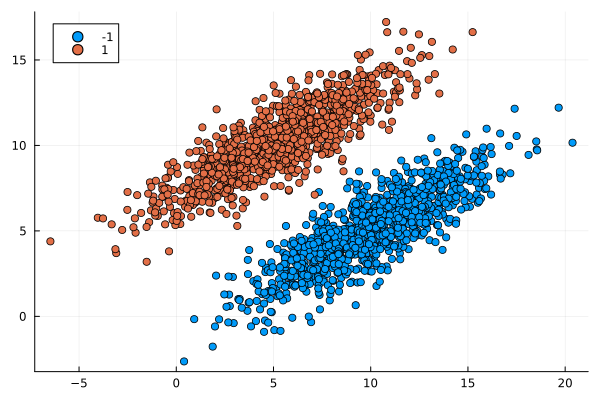

In [13]:
scatter(X[:,1], X[:,2], group=y_preds)

## Example 3 (non-linearly separable case)

In [14]:
function torus(u, v, a, b)
  x = (a + b * cos(v)) * cos(u)
  y = (a + b * cos(v)) * sin(u)
  return (x, y)
end

function generate_samples(n_points, a=1, b=0.1)
    data = zeros(n_points, 2)
    for i in 1:n_points
      u = rand() * 2π
      v = rand() * 2π
      (data[i, 1], data[i, 2]) = torus(u, v, a, b)
    end
    return data
end

generate_samples (generic function with 3 methods)

### Creating artificial data

In [15]:
n = 1000
data1 = hcat(generate_samples(n), ones(n))
negative_ones = -1 .* ones(n)
data2 = hcat(generate_samples(n, 0.2, 0.2), negative_ones)
plt = plot()
data = vcat(data1, data2);
data = data[shuffle(1:end), :];

### Visualizing the artificial data

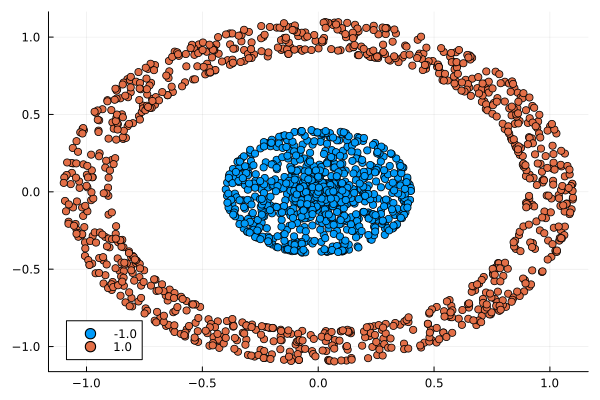

In [16]:
scatter(data[:,1], data[:,2], group=data[:,3])

### Training the perceptron model

In [17]:
X = data[:,1:2]
y = data[:,3]
perceptron_model =  perceptron_learning_rule(X, y, 20)

Cost = 1846.0
Cost = 1804.0
Cost = 1816.0
Cost = 1772.0
Cost = 1764.0
Cost = 1784.0
Cost = 1820.0
Cost = 1752.0
Cost = 1772.0
Cost = 1796.0
Cost = 1794.0
Cost = 1742.0
Cost = 1744.0
Cost = 1720.0
Cost = 1776.0
Cost = 1736.0
Cost = 1764.0
Cost = 1800.0
Cost = 1852.0
Cost = 1760.0


Perceptron(Real[0.018295790144113453, -0.005107332482520089, -0.026013215264957416], 1720.0)

### Visualizing the predictions

In [18]:
y_preds = [predict(perceptron_model, X[i,:]) for i = 1:size(X)[1]]
misclassification = misclassification_rate(y, y_preds) * 100
misclassification = round(misclassification, digits=2)
println("Misclassification rate: $misclassification %")

Misclassification rate: 63.8 %


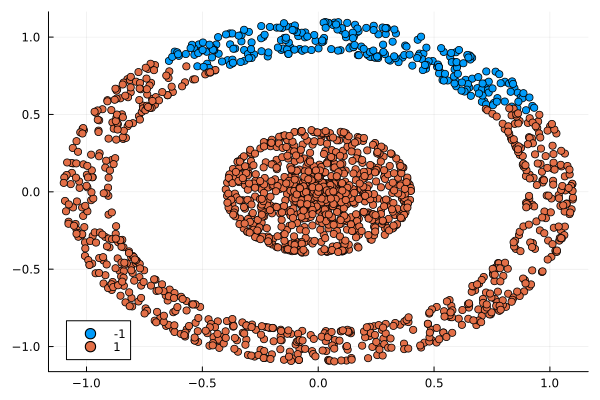

In [19]:
scatter(X[:,1], X[:,2], group=y_preds)

In [20]:
tanh(-)

LoadError: MethodError: no method matching tanh(::typeof(-))

[0mClosest candidates are:
[0m  tanh([91m::Float16[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mmath.jl:1558[24m[39m
[0m  tanh([91m::BigFloat[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mmpfr.jl:674[24m[39m
[0m  tanh([91m::Missing[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mmath.jl:1580[24m[39m
[0m  ...
